## EDA -Incidentes viales CDMX C5

La base de datos utilizada es la de Incidentes viales reportados por el Centro de Comando, Control, Cómputo, Comunicaciones y Contacto Ciudadano de la Ciudad de México (C5), la cual tiene información desde 2014 y actualizado mensualmente. 

### Diccionario de datos

folio: El folio único que tiene cada llamada que se registra<br>
fecha_creacion: Fecha en la que se realizó la llamada<br>
hora_creacion: Hora de creación de la llamada telefónica<br>
dia_semana: El día de la semana que se realizó la llamada(Lunes a Domingo)<br>
fecha_cierre: Fecha del cierre del reporte<br>
año_cierre:Año en el que se cerró el reporte de la llamada<br>
mes_cierre:Mes en el que se cerró el reporte de la llamada<br>
hora_cierre: Hora en la que se cerró el reporte de la llamada<br>
delegacion_inicio: Delegación en la que sucedió el accidente<br>
incidente_c4:Tipo de incidente reportado<br>
latitud: De donde sucedió el incidente<br>
longitud: De donde sucedió el incidente<br>
codigo_cierre: Clasificación de la llamada de acuerdo a un código de cierre<br>

A = “Afirmativo”: Una unidad de atención a emergencias fue despachada, llegó al lugar de los hechos y confirmó la emergencia reportada.<br>
N = “Negativo”: Una unidad de atención a emergencias fue despachada, llegó al lugar de los hechos, pero en el sitio del evento nadie confirmo la emergencia ni fue solicitado el apoyo de la unidad.<br>
I = “Informativo”: Corresponde a solicitudes de información.<br>
F = “Falso”: El incidente reportado inicialmente fue considerado como falso en el lugar de los hechos.<br>
D = “Duplicados”: El incidente reportado se registró en dos o más ocasiones procediendo a mantener un solo reporte como el original.<br>

clas_con_f_alarma:Clasificacion de la alarma reportada<br>
tipo_entrada:Entrada con la cual se registro la llamada<br>
delegacion_cierre:Delegación en la que se cerró el reporte de la llamada<br>
geopoint:Geolocalización del incidente reportado<br>
mes:Mes en número en el que se realizó la llamada.

### 1) Carga de información y conocimiento de variables

In [1]:
#Librerias utilizadas
import load_data
import transform_data
import eda
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
datos_c5=load_data.carga_archivo('incidentes-viales-c5.csv')

In [3]:
datos_c5.head(3)

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes
0,GA/160123/05714,23/01/2016,22:35:04,Sábado,(A) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,00:21:08,VENUSTIANO CARRANZA,accidente-choque sin lesionados,19.422113,-99.084643,EMERGENCIA,BOTÓN DE AUXILIO,VENUSTIANO CARRANZA,"19.422113,-99.084643",1
1,AO/160123/05826,23/01/2016,22:50:49,Sábado,(A) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,04:40:37,CUAJIMALPA,accidente-choque con lesionados,19.358320,-99.297641,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAJIMALPA,"19.35832,-99.297641",1
2,C4/160124/02187,24/01/2016,09:40:11,Domingo,(N) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,11:13:03,TLALPAN,accidente-choque sin lesionados,19.217070,-99.219070,EMERGENCIA,LLAMADA DEL 066,TLALPAN,"19.21707,-99.21907008",1


In [4]:
datos_copy=datos_c5.copy()  #Hacemos una copia del archivo original para trabajar con la copia
load_data.observaciones_variables(datos_copy)

Número de observaciones: 1303778 , Número de variables: 18 



In [5]:
datos_copy.columns

Index(['folio', 'fecha_creacion', 'hora_creacion', 'dia_semana',
       'codigo_cierre', 'fecha_cierre', 'año_cierre', 'mes_cierre',
       'hora_cierre', 'delegacion_inicio', 'incidente_c4', 'latitud',
       'longitud', 'clas_con_f_alarma', 'tipo_entrada', 'delegacion_cierre',
       'geopoint', 'mes'],
      dtype='object')

El nombre de las variables ya esta estandarizada y utiliza un formato "snake_case"

### 2) Limpieza de datos

Los registros tienen un formato inadecuado para el análisis, por lo que pasaremos todos los registros a minúsculas y eliminaremos acentos en algunas variables tipo <i>Object</i>.

In [6]:
transform_data.tipo_variables(datos_copy)


Tipo de variables:
 folio                 object
fecha_creacion        object
hora_creacion         object
dia_semana            object
codigo_cierre         object
fecha_cierre          object
año_cierre             int64
mes_cierre            object
hora_cierre           object
delegacion_inicio     object
incidente_c4          object
latitud              float64
longitud             float64
clas_con_f_alarma     object
tipo_entrada          object
delegacion_cierre     object
geopoint              object
mes                    int64
dtype: object


Las variables de fecha no tienen el tipo adecuado por lo que haremos la transformación. El resto de los tipos de variables son adeucuados.

In [7]:
datos_copy['fecha_creacion'] = pd.to_datetime(datos_copy['fecha_creacion'], format='%d/%m/%Y', errors='coerce')
datos_copy['hora_creacion'] = pd.to_datetime(datos_copy['hora_creacion'], format='%H:%M:%S', errors='coerce').dt.time
datos_copy['fecha_cierre'] = pd.to_datetime(datos_copy['fecha_cierre'], format='%d/%m/%Y', errors='coerce')
datos_copy['hora_cierre'] = pd.to_datetime(datos_copy['hora_cierre'], format='%H:%M:%S', errors='coerce').dt.time

In [8]:
datos_copy.dtypes

folio                        object
fecha_creacion       datetime64[ns]
hora_creacion                object
dia_semana                   object
codigo_cierre                object
fecha_cierre         datetime64[ns]
año_cierre                    int64
mes_cierre                   object
hora_cierre                  object
delegacion_inicio            object
incidente_c4                 object
latitud                     float64
longitud                    float64
clas_con_f_alarma            object
tipo_entrada                 object
delegacion_cierre            object
geopoint                     object
mes                           int64
dtype: object

A continuación cambiamos a minúsculas.

In [9]:
transform_data.cambiar_minusculas_variable(datos_copy,'folio')
transform_data.cambiar_minusculas_variable(datos_copy,'dia_semana')
transform_data.cambiar_minusculas_variable(datos_copy,'codigo_cierre')
transform_data.cambiar_minusculas_variable(datos_copy,'mes_cierre')
transform_data.cambiar_minusculas_variable(datos_copy,'delegacion_inicio')
transform_data.cambiar_minusculas_variable(datos_copy,'incidente_c4')
transform_data.cambiar_minusculas_variable(datos_copy,'clas_con_f_alarma')
transform_data.cambiar_minusculas_variable(datos_copy,'tipo_entrada')
transform_data.cambiar_minusculas_variable(datos_copy,'delegacion_cierre')
#transform_data.quitar_acentos(datos_copy)

In [10]:
datos_copy.head(3)

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes
0,ga/160123/05714,2016-01-23,22:35:04,sábado,(a) la unidad de atención a emergencias fue de...,2016-01-24,2016,enero,00:21:08,venustiano carranza,accidente-choque sin lesionados,19.422113,-99.084643,emergencia,botón de auxilio,venustiano carranza,"19.422113,-99.084643",1
1,ao/160123/05826,2016-01-23,22:50:49,sábado,(a) la unidad de atención a emergencias fue de...,2016-01-24,2016,enero,04:40:37,cuajimalpa,accidente-choque con lesionados,19.358320,-99.297641,urgencias medicas,botón de auxilio,cuajimalpa,"19.35832,-99.297641",1
2,c4/160124/02187,2016-01-24,09:40:11,domingo,(n) la unidad de atención a emergencias fue de...,2016-01-24,2016,enero,11:13:03,tlalpan,accidente-choque sin lesionados,19.217070,-99.219070,emergencia,llamada del 066,tlalpan,"19.21707,-99.21907008",1


### 3) Data Profiling

##### Variables numéricas
Se eliminarán por el momento las variables latitud, longitud y geopoint de las base porque por el momento no son de interes para el análisis exploratorio.

In [11]:
datos_copy=datos_copy.drop(columns=['latitud', 'longitud','geopoint'])

In [12]:
pd.options.display.float_format = '{:.2f}'.format
eda.tabla_estadisticos_descriptivos_variables_numericas(datos_copy)

,año_cierre,mes
max,2020.00,12.00
min,2014.00,1.00
mean,2016.84,6.57
std,1.77,3.53
q25,2015.00,3.00
median,2017.00,7.00
q75,2018.00,10.00
skew,-0.11,-0.03
kurt,-1.11,-1.28
count,1303778.00,1303778.00


En las variables numéricas <i>año_cierre</i> y <i>mes</i> no se encontraron datos faltantes.

##### Variables categóricas

In [13]:
eda.tabla_estadisticos_descriptivos_variables_categoricas(datos_copy)

,folio,hora_creacion,dia_semana,codigo_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,clas_con_f_alarma,tipo_entrada,delegacion_cierre
count,1303778,1303129,1303778,1303778,1303778,1303131,1303622,1303778,1303778,1303778,1303640
uniques,1303778,86271,7,5,12,86362,16,23,4,8,16
uniques_list,"[ga/160123/05714, ao/160123/05826, c4/160124/0...","[22:35:04, 22:50:49, 09:40:11, 22:40:57, 04:25...","[sábado, domingo, lunes, martes, miércoles, ju...",[(a) la unidad de atención a emergencias fue d...,"[enero, febrero, marzo, septiembre, octubre, m...","[00:21:08, 04:40:37, 11:13:03, 22:55:51, 05:03...","[venustiano carranza, cuajimalpa, tlalpan, mag...","[accidente-choque sin lesionados, accidente-ch...","[emergencia, urgencias medicas, falsa alarma, ...","[botón de auxilio, llamada del 066, radio, cám...","[venustiano carranza, cuajimalpa, tlalpan, mag..."
missings,0,649,0,0,0,647,156,0,0,0,138
prop_missings,0.00,0.05,0.00,0.00,0.00,0.05,0.01,0.00,0.00,0.00,0.01


Se encontró que en las variables categóricas hay datos faltantes para ciertas delegaciones.

A continuación se hará una estandarización de las variables <i>codigo_cierre</i> y <i>tipo_entrada</i>
Para <i>codigo_cierre</i> dejaremos únicamente las letras que definen este código, es decir elimaremos la descripción asociada, y para <i>tipo_entrada</i>

In [14]:
def estandariza_cod_cierre(codigo):
    if codigo=="(a) la unidad de atención a emergencias fue despachada, llegó al lugar de los hechos y confirmó la emergencia reportada":
        return "a"
    elif codigo=="(n) la unidad de atención a emergencias fue despachada, llegó al lugar de los hechos, pero en el sitio del evento nadie solicitó el apoyo de la unidad":
        return "n"
    elif codigo=="(d) el incidente reportado se registró en dos o más ocasiones procediendo a mantener un único reporte (afirmativo, informativo, negativo o falso) como el identificador para el incidente":
        return "d"
    elif codigo=="(f) el operador/a o despachador/a identifican, antes de dar respuesta a la emergencia, que ésta es falsa. o al ser despachada una unidad de atención a emergencias en el lugar de los hechos se percatan que el incidente no corresponde al reportado inicialmente":
        return "f"
    elif codigo=="(i) el incidente reportado es afirmativo y se añade información adicional al evento":
        return "i"
    else:
        return "no especifica"

In [15]:
datos_copy['codigo_cierre_std'] = datos_copy.codigo_cierre.str.slice(1,2)

In [16]:
datos_copy.codigo_cierre_std.unique()

array(['a', 'n', 'd', 'f', 'i'], dtype=object)

Se crea la variable <i>target</i> que es en esta caso una dummy, 1 para el paso en que la llamada fue **afirmativa** y 0 en otro caso. Esto porque el modelo que desarrollaremos más adelante consite en predecir si una nueva llamada es probable que sea afirmativa.

In [17]:
datos_copy['target']=np.where(datos_copy['codigo_cierre_std']=='a',1,0)

In [18]:
datos_copy.head(3)

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,clas_con_f_alarma,tipo_entrada,delegacion_cierre,mes,codigo_cierre_std,target
0,ga/160123/05714,2016-01-23,22:35:04,sábado,(a) la unidad de atención a emergencias fue de...,2016-01-24,2016,enero,00:21:08,venustiano carranza,accidente-choque sin lesionados,emergencia,botón de auxilio,venustiano carranza,1,a,1
1,ao/160123/05826,2016-01-23,22:50:49,sábado,(a) la unidad de atención a emergencias fue de...,2016-01-24,2016,enero,04:40:37,cuajimalpa,accidente-choque con lesionados,urgencias medicas,botón de auxilio,cuajimalpa,1,a,1
2,c4/160124/02187,2016-01-24,09:40:11,domingo,(n) la unidad de atención a emergencias fue de...,2016-01-24,2016,enero,11:13:03,tlalpan,accidente-choque sin lesionados,emergencia,llamada del 066,tlalpan,1,n,0


### 4) Análisis Exploratorio

##### 4.1 Frecuencias

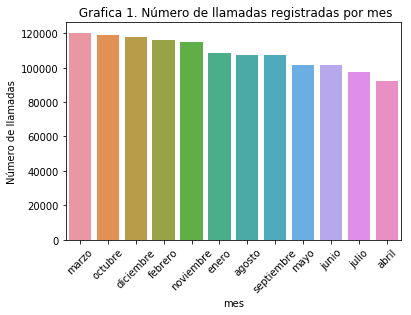

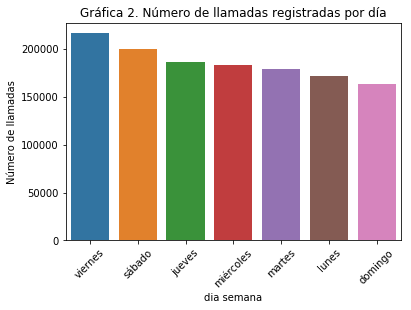

In [19]:
incidentes_por_mes=sns.countplot(x="mes_cierre", data=datos_copy,order = datos_copy['mes_cierre'].value_counts().index)
incidentes_por_mes.set_xticklabels(incidentes_por_mes.get_xticklabels(), rotation=45)
incidentes_por_mes.set(xlabel="mes",ylabel="Número de llamadas", title=" Grafica 1. Número de llamadas registradas por mes")
plt.show()
incidentes_por_dia=sns.countplot(x="dia_semana", data=datos_copy,order = datos_copy['dia_semana'].value_counts().index)
incidentes_por_dia.set_xticklabels(incidentes_por_dia.get_xticklabels(), rotation=45)
incidentes_por_dia.set(xlabel="dia semana",ylabel="Número de llamadas", title="Gráfica 2. Número de llamadas registradas por día")
plt.show()

De acuerdo al conteo de las llamadas por mes (Gráfica 1) y por día de la semana (Gráfica 2), podemos afirmar que el mes en el que ocurren mayor número de llamadas es marzo y curiosamente el mes de abril(consecutivo) es el que menos casos de llamadas tiene. De igual forma el día de la semana que mayor número de llamadas tiene es el viernes, lo cual es bastante factible porque es fin de semana y muchas personas salen de su rutina en ese día, del mismo modo el día domingo es el que menos casos tiene registrado pues se espera que en ese día la gente descanse.

##### 4.2 Series de tiempo

[Text(0, 0.5, 'Número de llamadas'),
 Text(0.5, 0, 'años'),
 Text(0.5, 1.0, 'Grafica 3. Número de llamadas registradas por día a traves del tiempo')]

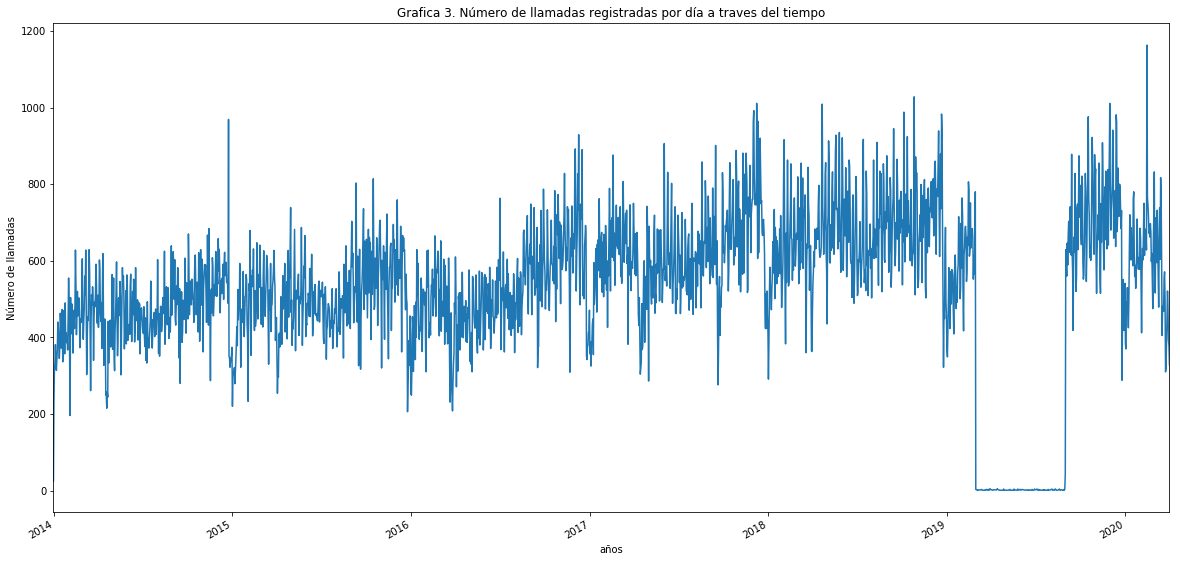

In [20]:
plt.rcParams["figure.figsize"] = (20,10)
llamadas_por_dia=datos_copy.groupby('fecha_creacion').folio.count().plot()
llamadas_por_dia.set(xlabel="años",ylabel="Número de llamadas", title="Grafica 3. Número de llamadas registradas por día a traves del tiempo")

De acuerdo a la Gráfica 3 de serie de tiempo de <i>llamadas por día</i> se observa el patrón de tendencia positiva, sin embargo exite un hueco entre los años 2019 y 2020, lo cual tendríamos que considerar para el modelado.

[Text(0, 0.5, 'Llamadas registradas por delegación'),
 Text(0.5, 0, 'años'),
 Text(0.5, 1.0, 'Gráfica 4. Número de llamadas registradas por delegacion día a traves del tiempo')]

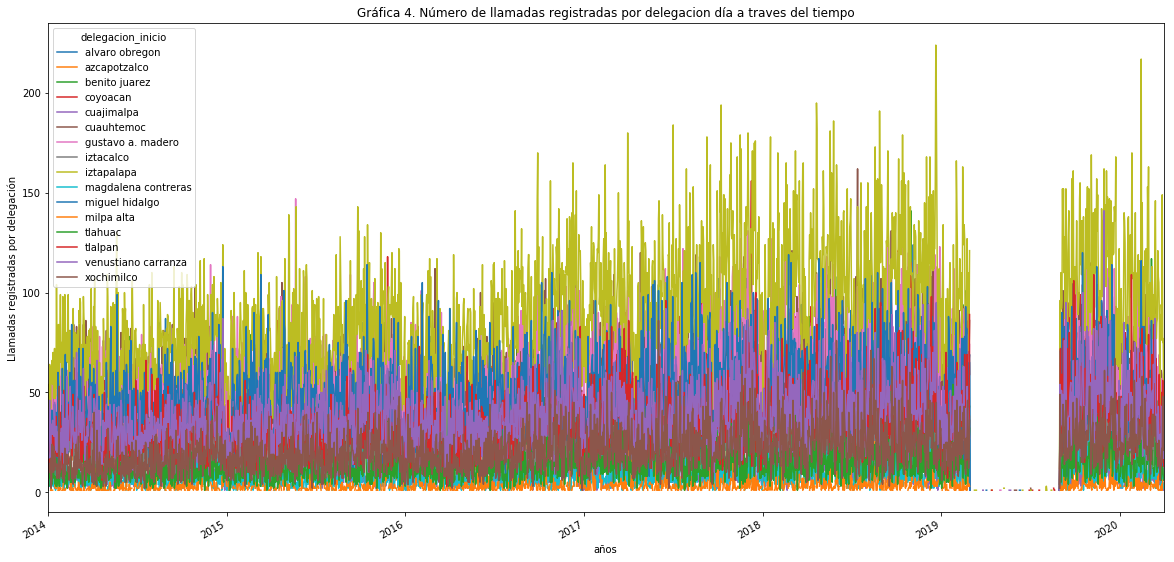

In [23]:
llamadas_por_delegacion=datos_copy.groupby(['fecha_creacion','delegacion_inicio']).folio.count().unstack(level=1).plot()
llamadas_por_delegacion.set(xlabel="años",ylabel="Llamadas registradas por delegación", title="Gráfica 4. Número de llamadas registradas por delegacion día a traves del tiempo")

De acuerdo al gráfico 4, podemos concluir que la delegación que tiene mayor número de llamadas es **Iztapalapa** y la que menor registros tiene es **milpa alta**.

[Text(0, 0.5, 'Llamadas por código de cierre'),
 Text(0.5, 0, 'años'),
 Text(0.5, 1.0, 'Gráfica 5. Número de llamadas registradas según el código de cierre')]

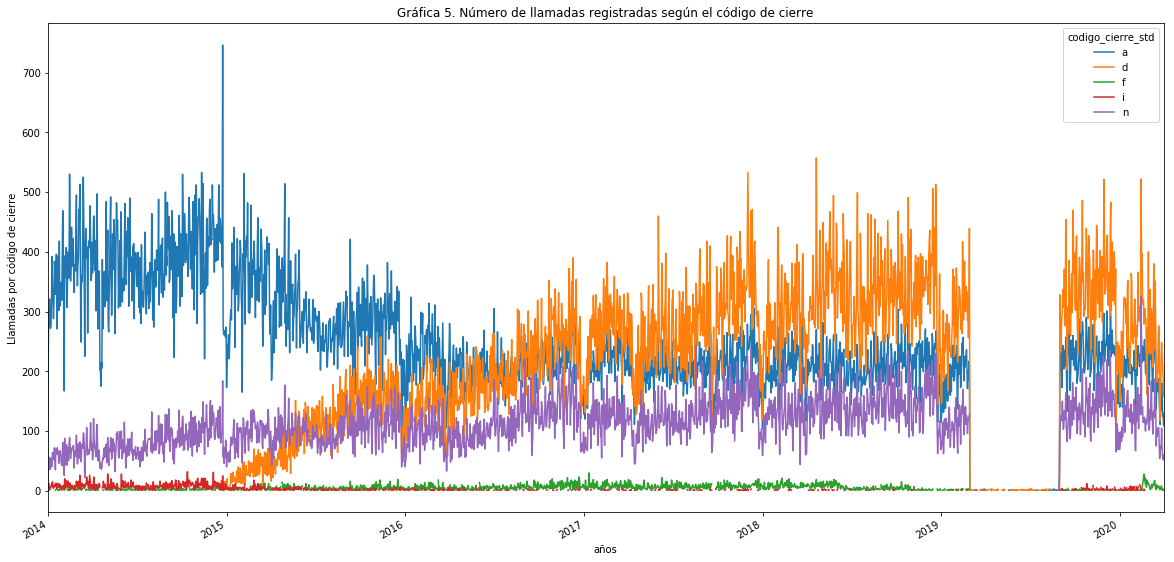

In [24]:
llamadas_por_codigo=datos_copy.groupby(['fecha_creacion','codigo_cierre_std']).folio.count().unstack(level=1).plot()
llamadas_por_codigo.set(xlabel="años",ylabel="Llamadas por código de cierre", title="Gráfica 5. Número de llamadas registradas según el código de cierre")

En la gráfica 5 obtuvimos un comportamiento contrario entre el código de cierre **a** y **d**, ya que a partir de finales del 2016 las llamadas <i>"Afirmativas"</i> comenzaron a decaer y las <i>"Duplicadas"</i> empezaron a tener tendencia positiva.

[Text(0, 0.5, 'Llamadas por tipo de alarma'),
 Text(0.5, 0, 'años'),
 Text(0.5, 1.0, 'Gráfica 6. Número de llamadas registradas según el tipo de alarma')]

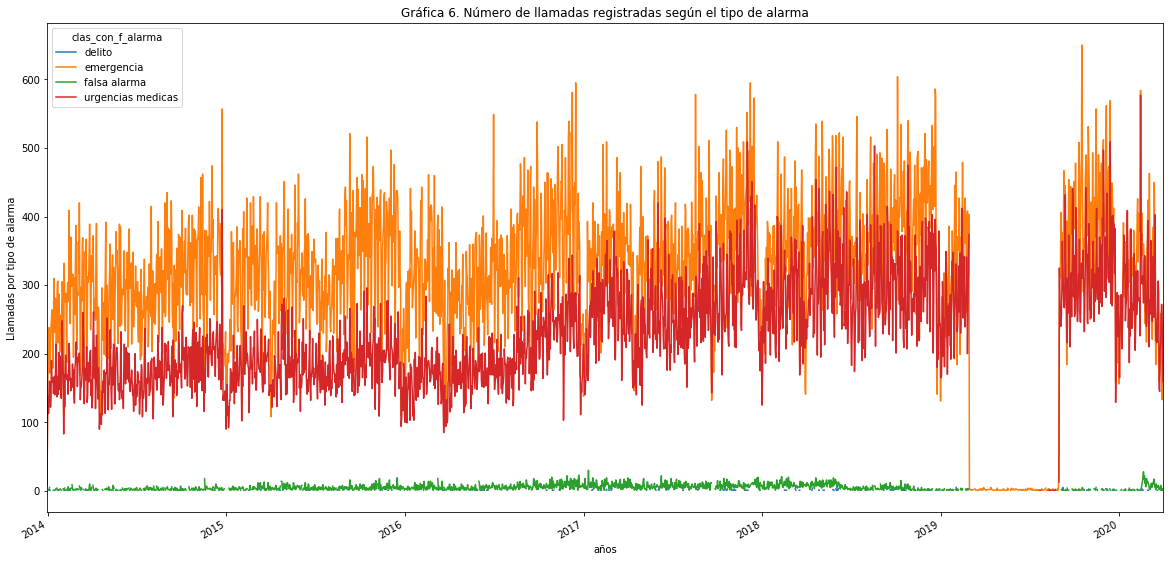

In [25]:
llamadas_por_alarma=datos_copy.groupby(['fecha_creacion','clas_con_f_alarma']).folio.count().unstack(level=1).plot()
llamadas_por_alarma.set(xlabel="años",ylabel="Llamadas por tipo de alarma", title="Gráfica 6. Número de llamadas registradas según el tipo de alarma")

En la gráfica 6 se encontró las llamadas registradas de incidentes viales tienen más número de reportes en la clasificada como **emergencia**.

[Text(0, 0.5, 'Llamadas por tipo de entrada'),
 Text(0.5, 0, 'años'),
 Text(0.5, 1.0, 'Gráfica 7. Número de llamadas registradas según el origen/tipo de entrada')]

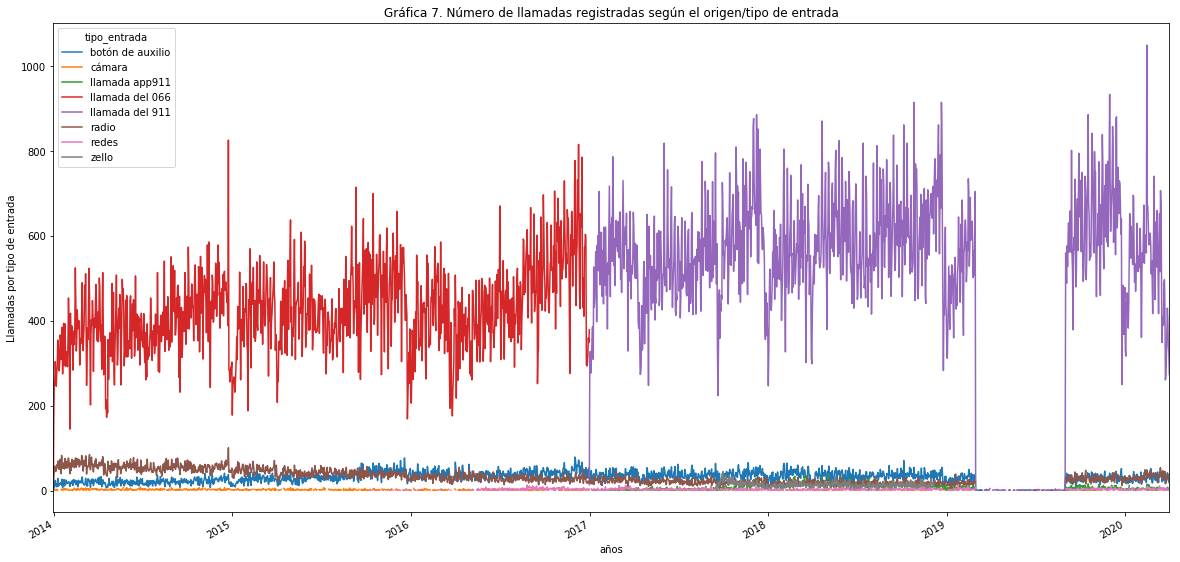

In [27]:
llamadas_tipo_ent=datos_copy.groupby(['fecha_creacion','tipo_entrada']).folio.count().unstack(level=1).plot()
llamadas_tipo_ent.set(xlabel="años",ylabel="Llamadas por tipo de entrada", title="Gráfica 7. Número de llamadas registradas según el origen/tipo de entrada")

De acuerdo a la gráfica 7, se obtuvo que el medio de comunicación más utilizado para reportar un incidente vial fue la llamada al 066 hasta el año 2017, y a apartir de ese momento se empezó a utilizar el la llamada del 911.